<img src="../imgs/speech.jpeg" style="width:1700px;">

# Complement lecture on Deep neuronal networks
### Additional applications

From DNN lecture seen on previous class, try to approach this algorithms in other application: audio recognition

In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

A typical library to read and rpocess audio is `librosa`. We firstly install library and then we can start to work. 

In [ ]:
!pip install librosa

# 1. Free Spoken Digit Dataset (FSDD)
## The speech MNIST

A simple audio/speech dataset consisting of recordings of spoken digits in wav files at 8kHz. The recordings are trimmed so that they have near minimal silence at the beginnings and ends [Source](https://github.com/Jakobovski/free-spoken-digit-dataset)

### Dataset description

- 4 speakers
- 2.000 recordings (50 of each digit per speaker)
- English pronunciations

An example of the dataset: `{digitLabel}_{speakerName}_{index}.wav` Example: `7_jackson_32.wav`

sr: 8000
wav shape: (3532,)


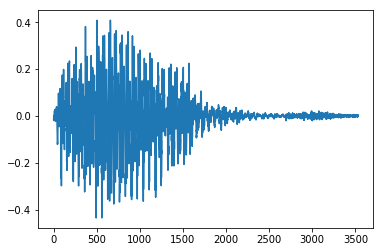

In [2]:
import librosa
wav, sr = librosa.load('../data/fsdd/8_jackson_40.wav', sr=None)
print 'sr:', sr
print 'wav shape:', wav.shape

plt.plot(wav);

more specifically..

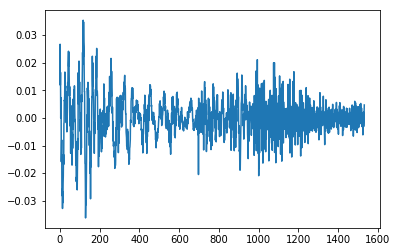

In [10]:
plt.plot(wav[2000:5000])

## <span style="color:orange">Student Challenge </span>: 
- Read the FSDD audio dataset, using `librosa` library
    - Built the $\mathbf{X} \in \mathbb{R}^{n \times m}$ matrix. The $n$ rows are the examples (20000) and $m$ colums is the dimension of each file. 
    - Built the $\mathbf{y} \in \mathbb{R}^{n}$ corresponding to classes labels. 
    
    
** Pay attention that all files dont have the same dimension. Then, we add zeros to obtain files with same size. This process is named `padding`    
- For so, you can use next function. 

In [3]:
def func_padding(wav, pad_size=10000):
    if wav.shape[0] > pad_size:
        return wav[0: pad_size]
    else:
        return np.hstack((wav, np.zeros(pad_size - wav.shape[0])))

In [ ]:

def get_XyData(DATA_DIR = '../data/fsdd/', pad_size=10000):

    
    return 

In [ ]:
X, y = get_XyData(DATA_DIR = '../data/fsdd/')
print 'X:', X.shape
print 'y:', y.shape

## <span style="color:orange">Student Challenge </span>:
- Split data on training (90% ) and test (10%).

## <span style="color:orange">Student Challenge </span>:
- Built a DNN with the following configuration: 
    - the input is the `x[0]` dimension
    - A hidden layer of 128 neurons. 
    - the output is `softmax` layer with `10` outputs, corresponding to classes
    - print the summary

In [ ]:




model.summary()

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

fit the model wit a  `batch_size=10` and `epochs=15`

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print 'Test accuracy:', test_acc, " test_loss: ", test_loss

Compile the model, using the next configuration

In [ ]:
history = model.fit(X_train,
          y_train,
          epochs=10,
          batch_size=40,
          validation_data=(X_test, y_test))

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## <span style="color:orange">Student Challenge </span>:
- what happened? ...
- Try with other DNN network more conected:
    - hidden layer of 10000
- Try with other DNN network **more deeply**:    
    - hidden layer of 1500
    - hidden layer of 500
    - hidden layer of 1500
- Try also changing padding parameter to obtaine samples with size: [5000, 20000]


In [ ]:
model = keras.models.Sequential([

    
    
    
])
model.summary()

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=4,
          batch_size=100,
          validation_data=(X_test, y_test))

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## <span style="color:orange">Student Challenge </span>:

- Raw signals are not good candidate to represent audio. So, we can compute a natural feature of this sign that is the FFT

See an example

(1025, 7)
(7175,)


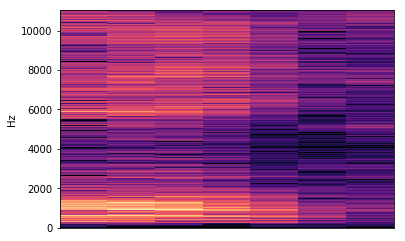

In [4]:
import librosa.display as dis
D = librosa.amplitude_to_db(np.abs(librosa.stft(wav)), ref=np.max)
print D.shape
print D.reshape(D.shape[0]*D.shape[1]).shape
dis.specshow(D, y_axis='linear');

In audio one of the more relevant and compact features is the `melspectrogram` [wiki](https://es.wikipedia.org/wiki/MFCC)

(128, 7)


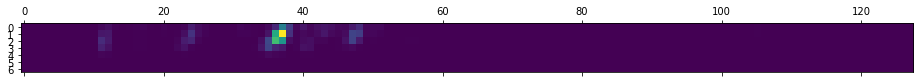

In [5]:
SP = librosa.feature.melspectrogram(wav)
print SP.shape
plt.matshow(SP.T)

## <span style="color:orange">Student Challenge </span>:

Built a function to recover $\mathbf{X},\mathbf{y}$ but using melspectrogram as descriptor. 
    - Do a padding of max = 1000

In [ ]:
def get_Xy_Features(DATA_DIR = '../data/fsdd/', pad_size=1000):
    

    
    
    return 


In [ ]:
from sklearn.model_selection import train_test_split
X, y = get_Xy_Features(DATA_DIR = '../data/fsdd/')
print 'X:', X.shape
print 'y:', y.shape
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

Now train a DNN model: 
    - Using an input of 1000.
    - A hidden layer of 2000 neurons
    - A hidden layer of 1000 neurons
    - A hidden layer of 500 neurons
    - A sof max layer of 10

In [ ]:
model = keras.models.Sequential([

    
    
])
model.summary()

In [ ]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,
          y_train,
          epochs=7,
          batch_size=300,
          validation_data=(X_test, y_test),
          verbose=False)

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=False)

print 'Test accuracy:', test_acc, " test_loss: ", test_loss

## <span style="color:orange">Student Challenge </span>:
- In this particular dataset, it is better to perform train-test split according to the actors, that its to say:
    - Three actors for training
    - The other actor for test. 
Built a function that receive a list with three actors for training and the actor for test and return the respectives $( \mathbf{X_{tr}}, \mathbf{X_{te}}, \mathbf{y_{tr}}, \mathbf{y_{te}} )$


In [8]:
DATA_DIR = '../data/fsdd/'
def fun_ByActor(list_train = ['jackson','theo','yweweler'], pad_size=1000):

    
    
            
                
    return np.vstack(X_tr),np.vstack(X_te), np.array(y_tr),np.array(y_te) 

In [ ]:
X_tr, X_te, y_tr, y_te = fun_ByActor(['jackson','theo','yweweler'], 1000)

In [11]:
print X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

(1500, 1000) (500, 1000) (1500,) (500,)


Check the previous configuration. 
 - What about the performance?

In [12]:
model = keras.models.Sequential([

    
    
    
    
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              2002000   
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              2001000   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 4,508,510
Trainable params: 4,508,510
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_tr,
          y_tr,
          epochs=10,
          batch_size=1000,
          validation_data=(X_te, y_te))

plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
test_loss, test_acc = model.evaluate(X_te, y_te, verbose=False)

print 'Test accuracy:', test_acc, " test_loss: ", test_loss

---
<img src="../imgs/bannerThanks.jpg" style="width:1000px;">